# **Correlación lineal -  Lista de Colegios Media 2018**

Se tomara el excel como ejercicio para validar la correlación entre las variables cuantitativas de algunos colegios, se seleccionara 3 Municipios por muestra y también se mostrara algunos métodos que se pueden utilizar para determinar esta correlación así como algunos gráficos.
Al final se dejara la conclusión utilizando el método de Pearson

In [60]:
# Cargo las librerias necesarias
#--------------------------------------------------------------
# Manejo de Datos
import pandas as pd
import numpy as np
# Generador de gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Procesamiento y análisis
import statsmodels.api as sm
import math
from scipy import stats
from scipy.stats import pearsonr
# Configuracion para matplotlib
plt.style.use('ggplot')
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Cargo la sabana de datos
sabana = pd.read_excel('/content/drive/MyDrive/EspecializacionA-D/Estadistica-1B/CorrelacionLineal/Lista_de_Colegios_Media_2018.xlsx')

In [62]:
# Valido las variables de la sabana
sabana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PUESTO      5000 non-null   int64  
 1   COLEGIO     5000 non-null   object 
 2   MUNICIPIO   5000 non-null   object 
 3   PRIMARIA    5000 non-null   float64
 4   SECUNDARIA  5000 non-null   float64
 5   MEDIA       5000 non-null   float64
 6   SIMPLE      5000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 273.6+ KB


In [63]:
# Convierto en dataframe

lcm = pd.DataFrame(sabana)

In [64]:
# Tomo una muestra aleatoria para validar con 5 registros
lcm.sample(n=5, random_state=1)

,PUESTO,COLEGIO,MUNICIPIO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
2764,2765,COL MADRE ANTONIA CERINI,MEDELLÍN,5.88,7.26,7.47,6.870
4767,4768,INSTITUCION EDUC NUEVA ESPERANZA LA PALMA,IBAGUÉ,6.88,5.93,5.09,5.967
3814,3815,INSTITUCION EDUCATIVA ROBINSON PITALUA,MONTERÍA,4.09,3.94,7.15,5.060
3499,3500,COLEGIO JUAN FRANCISCO BERBEO (IED),"BOGOTÁ, D.C.",6.89,5.87,7.31,6.690
2735,2736,COLEGIO TOMAS CARRASQUILLA (IED),"BOGOTÁ, D.C.",5.47,5.74,7.48,6.230


In [65]:
# Tomo la primeria muestra de 3 colegios dos capitales  y un colegio de una ciudad pequeña
lcm1 = lcm.query("MUNICIPIO == ['BOGOTÁ, D.C.','IBAGUÉ', 'CALI']")

In [66]:
# Valido la primera muestra
lcm1.head(5)

,PUESTO,COLEGIO,MUNICIPIO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
0,1,LIC CAMPO DAVID,"BOGOTÁ, D.C.",8.24,9.31,9.57,9.040
1,2,GIMNASIO COLOMBO BRITANICO,"BOGOTÁ, D.C.",8.25,8.84,9.54,8.877
3,4,COLEGIO PHILADELPHIA INTERNACIONAL,CALI,7.93,8.39,9.46,8.593
5,6,COL ANGLO AMERICANO,"BOGOTÁ, D.C.",8.54,8.56,9.45,8.850
6,7,COL NUEVO COLOMBO AMERICANO,"BOGOTÁ, D.C.",8.45,8.43,9.44,8.773


In [67]:
# Creo un nuevo dataframe 
lcm1N = lcm1[['PUESTO','PRIMARIA','SECUNDARIA','MEDIA','SIMPLE']]

In [68]:
# Valido las variables del nuevo data frame
lcm1N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 4996
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PUESTO      1139 non-null   int64  
 1   PRIMARIA    1139 non-null   float64
 2   SECUNDARIA  1139 non-null   float64
 3   MEDIA       1139 non-null   float64
 4   SIMPLE      1139 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 53.4 KB


In [69]:
# Valido el nuevo data frame
lcm1N.head(5)

,PUESTO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
0,1,8.24,9.31,9.57,9.040
1,2,8.25,8.84,9.54,8.877
3,4,7.93,8.39,9.46,8.593
5,6,8.54,8.56,9.45,8.850
6,7,8.45,8.43,9.44,8.773


In [70]:
# Media de la muestra
# Utilizo Pandas
pmedia = lcm1N.mean()

In [71]:
print('Media Primera Muestra | Con Pandas' ,'|', 'Puesto' ,pmedia.PUESTO, '|', 'Primaria', pmedia.PRIMARIA, '|', 'Secundaria',pmedia.SECUNDARIA,
      '|', 'Media',pmedia.MEDIA, '|', 'Simple',pmedia.SIMPLE)

Media Primera Muestra | Con Pandas | Puesto 1928.8217734855136 | Primaria 6.766944688323091 | Secundaria 7.022291483757683 | Media 7.57737489025461 | Simple 7.1221975417032475


In [72]:
# Varianza de la muestra
# Utilizo Pandas
pvar = lcm1N.var()

In [73]:
print('Varianza Primera Muestra | Con Pandas', '|', 'Puesto' ,pvar.PUESTO, '|', 'Primaria', pvar.PRIMARIA, '|', 'Secundaria', pvar.SECUNDARIA, '|', 'Media', pvar.MEDIA, '|', 'Simple', pvar.SIMPLE)

Varianza Primera Muestra | Con Pandas | Puesto 1567076.3346397344 | Primaria 1.4477078800662253 | Secundaria 1.333239647827234 | Media 0.5793685860473298 | Simple 0.7747743888867459


In [74]:
# Desviación estánda de la muestra
# Utilizo Pandas
pstd = lcm1N.std()

In [75]:
print('Desviación estánda Primera Muestra | Con Pandas', '|', 'Puesto' ,pstd.PUESTO, '|', 'Primaria', pstd.PRIMARIA, '|', 'Secundaria', pstd.SECUNDARIA, '|', 'Media' ,pstd.MEDIA, '|', 'Simple', pstd.SIMPLE)

Desviación estánda Primera Muestra | Con Pandas | Puesto 1251.8291954734616 | Primaria 1.2032073304573179 | Secundaria 1.1546599706525007 | Media 0.7611626541333526 | Simple 0.880212695254247


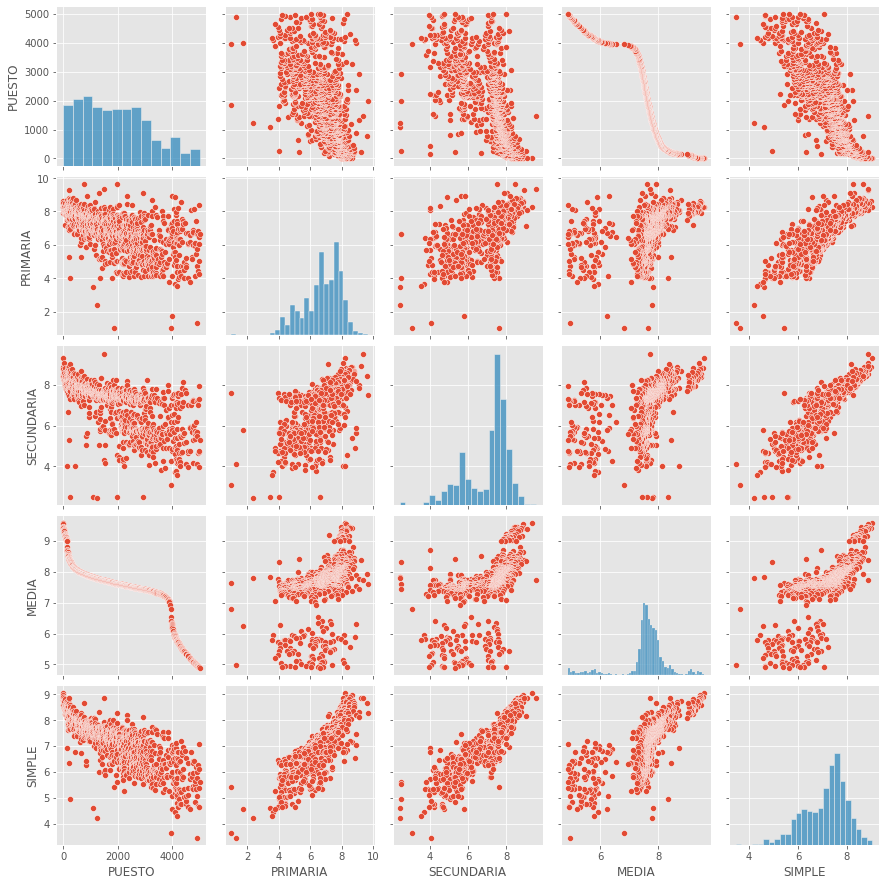

In [76]:
# Utilizo un histograma para validar la distribución de la variable

sns.pairplot(lcm1N)

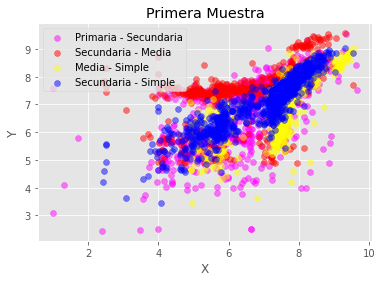

In [77]:
# Creo un diagrama de dispersión para la primera muestra
plt.scatter(lcm1N['PRIMARIA'],lcm1N['SECUNDARIA'], color='magenta', label="Primaria - Secundaria", alpha=0.5)
plt.scatter(lcm1N['SECUNDARIA'],lcm1N['MEDIA'], color='red', label="Secundaria - Media", alpha=0.5)
plt.scatter(lcm1N['MEDIA'],lcm1N['SIMPLE'], color='yellow', label="Media - Simple", alpha=0.5)
plt.scatter(lcm1N['SECUNDARIA'],lcm1N['SIMPLE'], color='blue', label="Secundaria - Simple", alpha=0.5)
plt.title('Primera Muestra')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Correlación lineal



La relacion siempre sera 1. de la variable con ella misma




In [78]:
# Metodo Pearson
rPearson1M = lcm1N.corr(method='pearson')

In [79]:
rPearson1M

,PUESTO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
PUESTO,1.000000,-0.572654,-0.645119,-0.877888,-0.796061
PRIMARIA,-0.572654,1.000000,0.680610,0.432478,0.877911
SECUNDARIA,-0.645119,0.680610,1.000000,0.528747,0.899802
MEDIA,-0.877888,0.432478,0.528747,1.000000,0.716502
SIMPLE,-0.796061,0.877911,0.899802,0.716502,1.000000


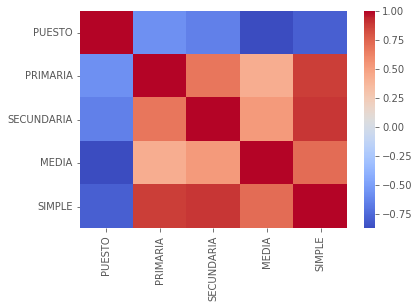

In [80]:
# Mapa de calor de las correlaciones
sns.heatmap(
    rPearson1M,
    xticklabels=rPearson1M.columns,
    yticklabels=rPearson1M.columns,
    cmap='coolwarm'
)

Azul = Correlacion Negativa | Rojo = Correlacion Positiva

In [81]:
# Metodo Spearman
rSpearman1M = lcm1N.corr(method='spearman')

In [82]:
rSpearman1M

,PUESTO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
PUESTO,1.000000,-0.638514,-0.754574,-0.999944,-0.827480
PRIMARIA,-0.638514,1.000000,0.750080,0.633130,0.896592
SECUNDARIA,-0.754574,0.750080,1.000000,0.750467,0.923478
MEDIA,-0.999944,0.633130,0.750467,1.000000,0.822887
SIMPLE,-0.827480,0.896592,0.923478,0.822887,1.000000


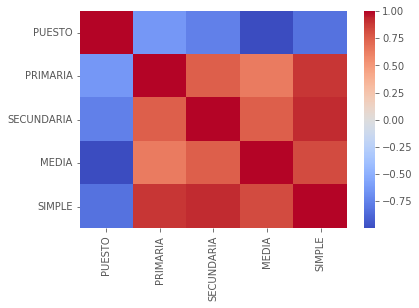

In [83]:
# Mapa de calor de las correlaciones
sns.heatmap(
    rSpearman1M,
    xticklabels=rSpearman1M.columns,
    yticklabels=rSpearman1M.columns,
    cmap='coolwarm'
)

In [84]:
# Metodo Kendall
rKendall1M = lcm1N.corr(method='kendall')

In [85]:
rKendall1M

,PUESTO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
PUESTO,1.000000,-0.469195,-0.575423,-0.995851,-0.650389
PRIMARIA,-0.469195,1.000000,0.570463,0.464970,0.743354
SECUNDARIA,-0.575423,0.570463,1.000000,0.572610,0.768789
MEDIA,-0.995851,0.464970,0.572610,1.000000,0.644795
SIMPLE,-0.650389,0.743354,0.768789,0.644795,1.000000


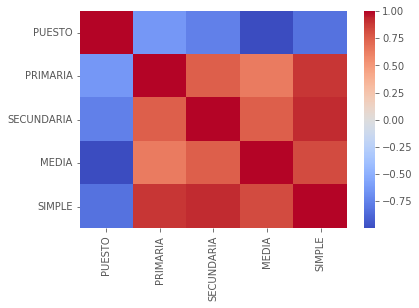

In [86]:
# Mapa de calor de las correlaciones
sns.heatmap(
    rSpearman1M,
    xticklabels=rKendall1M.columns,
    yticklabels=rKendall1M.columns,
    cmap='coolwarm'
)

In [87]:
# Tomo la segunda muestra de 3 colegios dos capitales  y un colegio de una ciudad pequeña
lcm2 = lcm.query("MUNICIPIO == ['MEDELLÍN','BARRANQUILLA', 'CARTAGENA']")

In [88]:
# Valido las variables de la segunda muestra
lcm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 2 to 4984
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PUESTO      388 non-null    int64  
 1   COLEGIO     388 non-null    object 
 2   MUNICIPIO   388 non-null    object 
 3   PRIMARIA    388 non-null    float64
 4   SECUNDARIA  388 non-null    float64
 5   MEDIA       388 non-null    float64
 6   SIMPLE      388 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 24.2+ KB


In [89]:
# Valido la segunda muestra
lcm2.head(5)

,PUESTO,COLEGIO,MUNICIPIO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
2,3,NUEVO COLEGIO DEL PRADO,BARRANQUILLA,7.88,8.54,9.49,8.637
25,26,CENTRO EDUCATIVO BOSTON INTERNACIONAL,BARRANQUILLA,7.95,8.23,9.35,8.510
46,47,COL DE LA COMPANIA DE MARIA,MEDELLÍN,8.23,8.45,9.25,8.643
49,50,INSTITUTO ALEXANDER VON HUMBOLDT,BARRANQUILLA,8.31,8.28,9.24,8.610
59,60,COL CORAZONISTA,MEDELLÍN,7.80,8.00,9.22,8.340


In [90]:
# Creo un nuevo dataframe solo con Puesto - Primaria - Secundaria
lcm2N = lcm2[['PUESTO','PRIMARIA','SECUNDARIA','MEDIA','SIMPLE']]

In [91]:
# Valido las variables del nuevo data frame
lcm2N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 2 to 4984
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PUESTO      388 non-null    int64  
 1   PRIMARIA    388 non-null    float64
 2   SECUNDARIA  388 non-null    float64
 3   MEDIA       388 non-null    float64
 4   SIMPLE      388 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 18.2 KB


In [92]:
# Valido el nuevo data frame
lcm2N.head(5)

,PUESTO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
2,3,7.88,8.54,9.49,8.637
25,26,7.95,8.23,9.35,8.510
46,47,8.23,8.45,9.25,8.643
49,50,8.31,8.28,9.24,8.610
59,60,7.80,8.00,9.22,8.340


In [93]:
# Media de la muestra

p2media = lcm2N.mean()

In [94]:
print('Media Segunda Muestra | Con Pandas' ,'|', 'Puesto' ,p2media.PUESTO, '|', 'Primaria', p2media.PRIMARIA, '|', 'Secundaria',p2media.SECUNDARIA,
      '|', 'Media',p2media.MEDIA, '|', 'Simple',p2media.SIMPLE)

Media Segunda Muestra | Con Pandas | Puesto 2254.090206185567 | Primaria 6.335953608247422 | Secundaria 6.558170103092784 | Media 7.356932989690721 | Simple 6.750332474226804


In [95]:
# Varianza de la muestra
# Utilizo Pandas
p2var = lcm2N.var()

In [96]:
print('Varianza Segunda Muestra | Con Pandas', '|', 'Puesto' ,p2var.PUESTO, '|', 'Primaria', p2var.PRIMARIA, '|', 'Secundaria', p2var.SECUNDARIA, '|', 'Media', p2var.MEDIA, '|', 'Simple', p2var.SIMPLE)

Varianza Segunda Muestra | Con Pandas | Puesto 2100393.028017529 | Primaria 1.761674798875836 | Secundaria 1.8838558159514105 | Media 0.9917463830949146 | Simple 1.1217641915008392


In [97]:
# Desviación estánda de la muestra

# Utilizo Pandas
p2std = lcm2N.std()

In [98]:
print('Desviación estánda Segunda Muestra | Con Pandas', '|', 'Puesto' ,p2std.PUESTO, '|', 'Primaria', p2std.PRIMARIA, '|', 'Secundaria', p2std.SECUNDARIA, '|', 'Media' ,p2std.MEDIA, '|', 'Simple', p2std.SIMPLE)

Desviación estánda Segunda Muestra | Con Pandas | Puesto 1449.2732758239658 | Primaria 1.3272809796255787 | Secundaria 1.3725362712698745 | Media 0.995864640950222 | Simple 1.0591336985956208


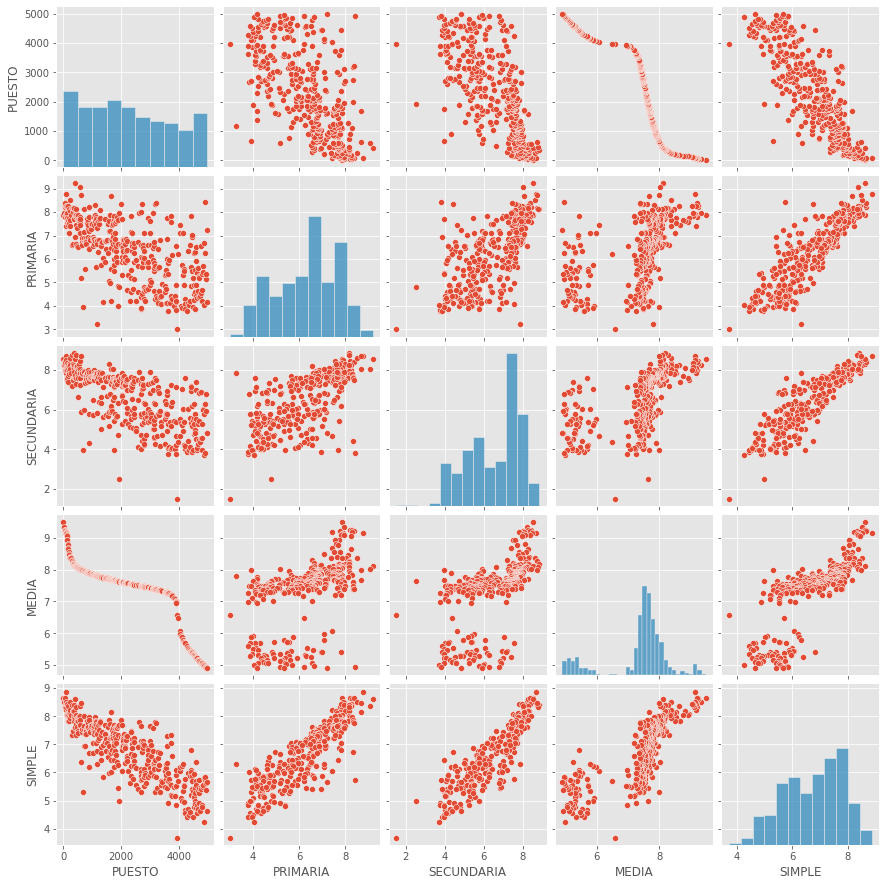

In [99]:
# Utilizo un histograma para validar la distribucion de la variable

sns.pairplot(lcm2N)

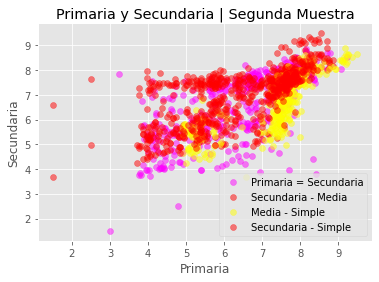

In [100]:
# Creo un diagrama de dispersión para la segunda muestra
plt.scatter(lcm2N['PRIMARIA'],lcm2N['SECUNDARIA'], color='magenta', label="Primaria = Secundaria", alpha=0.5)
plt.scatter(lcm2N['SECUNDARIA'],lcm2N['MEDIA'], color='red', label="Secundaria - Media",  alpha=0.5)
plt.scatter(lcm2N['MEDIA'],lcm2N['SIMPLE'], color='yellow', label="Media - Simple",  alpha=0.5)
plt.scatter(lcm2N['SECUNDARIA'],lcm2N['SIMPLE'], color='red', label="Secundaria - Simple",  alpha=0.5)
plt.title('Primaria y Secundaria | Segunda Muestra')
plt.xlabel("Primaria")
plt.ylabel("Secundaria")
plt.legend()
plt.show()

El diagrama de dispersión parece indicar una relación lineal positiva entre algunas variables

## Correlacion Lineal

In [101]:
# Correlacón utlizando libreria pandas
print('Correlación Pearson: ', lcm2N['PRIMARIA'].corr(lcm2N['SECUNDARIA'], method='pearson'))
print('Correlación spearman: ', lcm2N['PRIMARIA'].corr(lcm2N['SECUNDARIA'], method='spearman'))
print('Correlación kendall: ', lcm2N['PRIMARIA'].corr(lcm2N['SECUNDARIA'], method='kendall'))

Correlación Pearson:  0.6872704810691732
Correlación spearman:  0.7254190270142654
Correlación kendall:  0.5442316442065123


In [102]:
rPearson2M = lcm2N.corr(method='pearson')

In [103]:
rPearson2M

,PUESTO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
PUESTO,1.000000,-0.631868,-0.699044,-0.897716,-0.847286
PRIMARIA,-0.631868,1.000000,0.687270,0.516241,0.876421
SECUNDARIA,-0.699044,0.687270,1.000000,0.581415,0.901300
MEDIA,-0.897716,0.516241,0.581415,1.000000,0.780242
SIMPLE,-0.847286,0.876421,0.901300,0.780242,1.000000


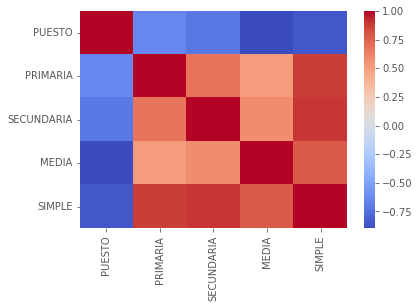

In [104]:
# Mapa de calor de las correlaciones
sns.heatmap(
    rPearson2M,
    xticklabels=rPearson2M.columns,
    yticklabels=rPearson2M.columns,
    cmap='coolwarm'
)

In [105]:
rSpearman2M = lcm2N.corr(method='spearman')

In [106]:
rSpearman2M

,PUESTO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
PUESTO,1.000000,-0.655003,-0.759587,-0.999935,-0.852804
PRIMARIA,-0.655003,1.000000,0.725419,0.650442,0.886907
SECUNDARIA,-0.759587,0.725419,1.000000,0.755624,0.920806
MEDIA,-0.999935,0.650442,0.755624,1.000000,0.848968
SIMPLE,-0.852804,0.886907,0.920806,0.848968,1.000000


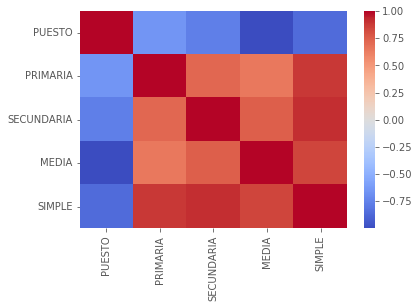

In [107]:
# Mapa de calor de las correlaciones
sns.heatmap(
    rSpearman2M,
    xticklabels=rSpearman2M.columns,
    yticklabels=rSpearman2M.columns,
    cmap='coolwarm'
)

In [108]:
rKendall2M = lcm2N.corr(method='kendall')

In [109]:
rKendall2M

,PUESTO,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
PUESTO,1.000000,-0.477612,-0.566148,-0.996417,-0.671855
PRIMARIA,-0.477612,1.000000,0.544232,0.474471,0.720038
SECUNDARIA,-0.566148,0.544232,1.000000,0.563778,0.756888
MEDIA,-0.996417,0.474471,0.563778,1.000000,0.667089
SIMPLE,-0.671855,0.720038,0.756888,0.667089,1.000000


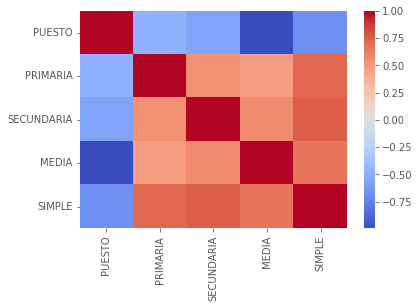

In [110]:
# Mapa de calor de las correlaciones
sns.heatmap(
    rKendall2M,
    xticklabels=rKendall2M.columns,
    yticklabels=rKendall2M.columns,
    cmap='coolwarm'
)

Correlacion de ambas muestras

In [111]:
# Correlacion de las 2 muetras con Pearson
print("Primera Muestra" "\n", rPearson1M, "\n" "Segunda Muestra" "\n", rPearson2M)


Primera Muestra
               PUESTO  PRIMARIA  SECUNDARIA     MEDIA    SIMPLE
PUESTO      1.000000 -0.572654   -0.645119 -0.877888 -0.796061
PRIMARIA   -0.572654  1.000000    0.680610  0.432478  0.877911
SECUNDARIA -0.645119  0.680610    1.000000  0.528747  0.899802
MEDIA      -0.877888  0.432478    0.528747  1.000000  0.716502
SIMPLE     -0.796061  0.877911    0.899802  0.716502  1.000000 
Segunda Muestra
               PUESTO  PRIMARIA  SECUNDARIA     MEDIA    SIMPLE
PUESTO      1.000000 -0.631868   -0.699044 -0.897716 -0.847286
PRIMARIA   -0.631868  1.000000    0.687270  0.516241  0.876421
SECUNDARIA -0.699044  0.687270    1.000000  0.581415  0.901300
MEDIA      -0.897716  0.516241    0.581415  1.000000  0.780242
SIMPLE     -0.847286  0.876421    0.901300  0.780242  1.000000


In [112]:
# Correlacion de las 2 muetras con Spearman
print("Primera Muestra" "\n", rSpearman1M, "\n" "Segunda Muestra" "\n", rSpearman2M)


Primera Muestra
               PUESTO  PRIMARIA  SECUNDARIA     MEDIA    SIMPLE
PUESTO      1.000000 -0.638514   -0.754574 -0.999944 -0.827480
PRIMARIA   -0.638514  1.000000    0.750080  0.633130  0.896592
SECUNDARIA -0.754574  0.750080    1.000000  0.750467  0.923478
MEDIA      -0.999944  0.633130    0.750467  1.000000  0.822887
SIMPLE     -0.827480  0.896592    0.923478  0.822887  1.000000 
Segunda Muestra
               PUESTO  PRIMARIA  SECUNDARIA     MEDIA    SIMPLE
PUESTO      1.000000 -0.655003   -0.759587 -0.999935 -0.852804
PRIMARIA   -0.655003  1.000000    0.725419  0.650442  0.886907
SECUNDARIA -0.759587  0.725419    1.000000  0.755624  0.920806
MEDIA      -0.999935  0.650442    0.755624  1.000000  0.848968
SIMPLE     -0.852804  0.886907    0.920806  0.848968  1.000000


In [113]:
# Correlacion de las 2 muetras con Kendall
print("Primera Muestra" "\n", rKendall1M, "\n" "Segunda Muestra" "\n", rKendall2M)

Primera Muestra
               PUESTO  PRIMARIA  SECUNDARIA     MEDIA    SIMPLE
PUESTO      1.000000 -0.469195   -0.575423 -0.995851 -0.650389
PRIMARIA   -0.469195  1.000000    0.570463  0.464970  0.743354
SECUNDARIA -0.575423  0.570463    1.000000  0.572610  0.768789
MEDIA      -0.995851  0.464970    0.572610  1.000000  0.644795
SIMPLE     -0.650389  0.743354    0.768789  0.644795  1.000000 
Segunda Muestra
               PUESTO  PRIMARIA  SECUNDARIA     MEDIA    SIMPLE
PUESTO      1.000000 -0.477612   -0.566148 -0.996417 -0.671855
PRIMARIA   -0.477612  1.000000    0.544232  0.474471  0.720038
SECUNDARIA -0.566148  0.544232    1.000000  0.563778  0.756888
MEDIA      -0.996417  0.474471    0.563778  1.000000  0.667089
SIMPLE     -0.671855  0.720038    0.756888  0.667089  1.000000


In [114]:
dr = pd.DataFrame()
dr['Rango'] = None
dr['Relacion Lineal'] = None

In [115]:
# Tabla de Relacion 
rl = ['Perfecta','Fuerte','Significativa','Moderada','Debil','Muy Debil','Nula']
ra = ['0,96 - 1,0', '0,85 - 0,95','0,70 - 0,84','0,50 - 0,69','0,20 - 0,49',
       '0,10 - 0,19','0,09 - 0,0']

In [116]:
dr['Rango'] = ra

In [117]:
dr['Relacion Lineal'] = rl

# Tabla para identificar resultados del analisis

Segun el rango del metodo utilizado

## **Coeficiente de Correlación**

---
Interpretación
---
El valor del índice de correlación varía en el intervalo [-1,1], indicando el signo el sentido de la relación:

Si r =1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
Si 0 < r < 1  entonces existe una correlación positiva.
Si r = 0 entonces no existe relación lineal pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.
Si  -1 < r < 0 , existe una correlación negativa.
Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación opuesta: cuando una de ellas aumenta, la otra cambia su signo en proporción constante.

[Fuente](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)



In [118]:
dr

,Rango,Relacion Lineal
0,"0,96 - 1,0",Perfecta
1,"0,85 - 0,95",Fuerte
2,"0,70 - 0,84",Significativa
3,"0,50 - 0,69",Moderada
4,"0,20 - 0,49",Debil
5,"0,10 - 0,19",Muy Debil
6,"0,09 - 0,0",Nula


Tomando como base la anterior tabla se puede concluir que:

**PRIMERA MUESTRA**
                  *Pearson*

*   Primaria - Secundaria [**Moderada**]
*   Secundaria - Media [**Moderada**]
*   Media - Simple [**Significativa**]
*   Primaria - Media [**Debil**]
*   Primaria - Simple [**Fuerte**]
*   Secundaria - Simple [**Fuerte**]

**SEGUNDA MUESTRA**
                  *Pearson*

*   Primaria - Secundaria [**Moderada**]
*   Secundaria - Media [**Moderada**]
*   Media - Simple [**Significativa**]
*   Primaria - Media [**Moderada**]
*   Primaria - Simple [**Fuerte**]
*   Secundaria - Simple [**Fuerte**]

